## HW5
### Problem1

$dr(t)=(\mu-kr(t))dt+\sigma dW_t$

Derive SDE for the short rate, r(t), under the T-forward measure

$p(t,T)=E^Q[e^{-\int_t^T r_s ds}|F_t]$

So we want to find the likelihood $L_t$ first.

$L_t=\frac{dQ^T}{dQ} = \frac{p(t,T)}{B(t)p(0,T)}\ $ is a Q-martingale

If $dp(t,T)=r(t)dt+v(t)dW_t, \ dB(t)=r(t)dt$

$Then \ dL_t = \frac{dp(t,T)}{B(t)p(0,T)}-\frac{dB(t)p(t,T)}{B^2(t)p(0,T)}= v(t)L_tdW_t$

$dL_t=L(t)v(t)dW_t$


* From HW4, we know that $e^{\int_0^t r_s ds} p(t,T) \ $ is a martingale
* So we get the PDE
\begin{align*} 
-rp+p_r(\mu-\kappa r(t))+ \frac{1}{2}p_{rr}(\sigma^2)=0\\
p|_{t=T}=1
\end{align*}

* Let $p(t,T)=e^{A(t,T)-B(t,T)r(t)}$
* We get $-rp+(A'-B'r)p-B(\mu-\kappa r)p+\frac{1}{2}B^2\sigma^2p=0$
* Seperate the constant and r term, we have
\begin{align*} 
A'-\mu B+\frac{1}{2}\sigma^2 B^2=0 \\
B'-\kappa B+1=0
\end{align*}

* We get $B(t,T)= ce^{kt}+\frac{1}{k}$
* $B(T,T)=0,\ so \ c=-\frac{1}{k}e^{-kT},$ $B(t,T)=-\frac{1}{k}(e^{k(t-T)}-1)$

$$dp(t,T)=(...)dt-pB\sigma dW_t$$
$$v(t)=B(t,T)\sigma=-\frac{1}{k}(e^{k(t-T)}-1)\sigma$$
From Girsanov Theorem,
$$dW_t=dW_t^T+v(t)$$
The SDE for T-forward measure should be
$$ dr=(\mu-kr(t)-\frac{1}{k}(e^{k(t-T)}-1)\sigma^2)dt+dW_t^T$$

### Problem2

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

/Users/qichaohuang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data=pd.read_excel("CMT-all.xlsx")
data.set_index('Date',inplace=True)
data=data.loc["2007-01-02":]

In [3]:
data.tail()

,1M,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
Date,,,,,,,,,,,
2017-01-20,0.46,0.50,0.62,0.82,1.20,1.50,1.95,2.28,2.48,2.79,3.05
2017-01-23,0.46,0.51,0.59,0.79,1.16,1.43,1.88,2.19,2.41,2.72,2.99
2017-01-24,0.50,0.51,0.62,0.81,1.21,1.49,1.94,2.27,2.47,2.78,3.05
2017-01-25,0.48,0.50,0.61,0.82,1.23,1.52,1.99,2.33,2.53,2.84,3.10
2017-01-26,0.49,0.51,0.62,0.82,1.21,1.49,1.95,2.30,2.51,2.82,3.08


In [4]:
beta=pd.read_csv("beta.csv",index_col=[0])
beta.index=pd.to_datetime(beta.index)

In [5]:
beta.dropna(inplace=True)
beta.tail()

,beta0,beta1,beta2
Date,,,
2017-01-20,3.242280,-2.851676,-0.842162
2017-01-23,3.182040,-2.783037,-0.982151
2017-01-24,3.242407,-2.829846,-0.912438
2017-01-25,3.301071,-2.911504,-0.842618
2017-01-26,3.288351,-2.879492,-0.950099


ADF test for  beta1
ADF Statistic: -1.825647
p-value: 0.367805
Critical Values:
	5%: -2.863
	1%: -3.433
	10%: -2.567


ADF test for  beta2
ADF Statistic: -2.725448
p-value: 0.069737
Critical Values:
	5%: -2.863
	1%: -3.433
	10%: -2.567


ADF test for  beta3
ADF Statistic: -2.261252
p-value: 0.184769
Critical Values:
	5%: -2.863
	1%: -3.433
	10%: -2.567




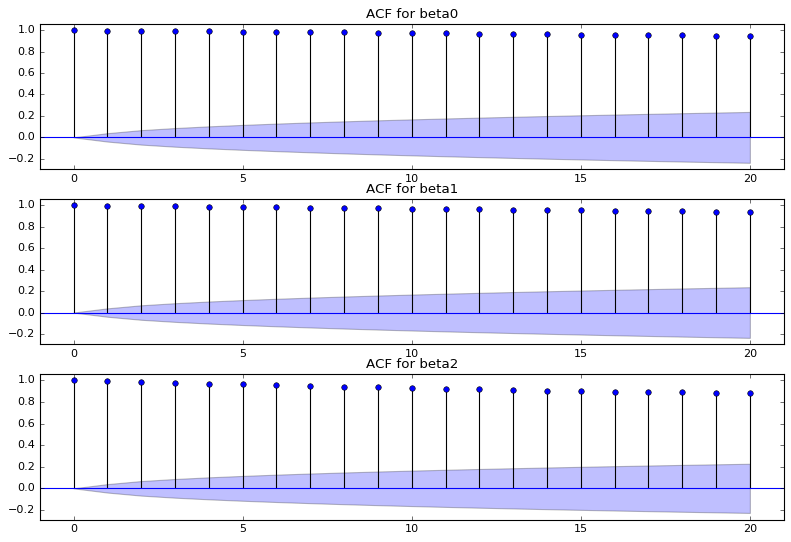

In [6]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
#print sm.stats.durbin_watson(beta)
fig,axes=plt.subplots(3,1,figsize=(12,8))
for i in range(3):
    sm.graphics.tsa.plot_acf(beta.iloc[:,i].values.squeeze(), lags=20,ax=axes[i]);
    axes[i].set_title('ACF for beta{}'.format(str(i)))
    result=adfuller(beta.iloc[:,i])
    print 'ADF test for ',''.join(['beta',str(i+1)])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print '\n'

In [7]:
#Half life
def half_life(x,dt=1./260):
    x = list(x)
    X=sm.add_constant(x[:-1])
    Y=x[1:]
    res = sm.OLS(Y,X).fit()
    R = res.params[1]
    half_life = np.log(0.5)/np.log(R)*dt
    return half_life

print "half life for beta \n",beta.apply(half_life,axis=0)

half life for beta 
beta0    0.994701
beta1    0.806156
beta2    0.377095
dtype: float64


#### In the 5% level, we fail to reject that the time series has a unit root.

### Part2 

In [8]:
error_df=pd.DataFrame(columns=['beta0','beta1','beta2'])
ar_res=[]
for i in range(3):
    ar_test=AR(beta.iloc[:,i]).fit(1)
    ar_res.append(ar_test)
    print ar_test.params
    error_df.loc[:,'beta'+str(i)]=ar_test.predict(start=1,dynamic=False)-beta.iloc[1:,i]
error_df.head()

const       0.010362
L1.beta0    0.997323
dtype: float64
const      -0.012581
L1.beta1    0.996698
dtype: float64
const      -0.021572
L1.beta2    0.992955
dtype: float64


/Users/qichaohuang/anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


,beta0,beta1,beta2
Date,,,
2007-01-03,0.001781,-0.027167,0.088984
2007-01-04,0.038281,-0.035772,0.055644
2007-01-05,-0.013780,-0.008463,-0.144562
2007-01-08,-0.003225,-0.060074,0.009857
2007-01-09,0.001381,-0.033192,0.011704


In [9]:
error_df['RMSE']=error_df.apply(lambda x:np.sqrt((x**2).mean()),axis=1)
error_df.head()

,beta0,beta1,beta2,RMSE
Date,,,,
2007-01-03,0.001781,-0.027167,0.088984,0.053726
2007-01-04,0.038281,-0.035772,0.055644,0.044126
2007-01-05,-0.013780,-0.008463,-0.144562,0.083983
2007-01-08,-0.003225,-0.060074,0.009857,0.035197
2007-01-09,0.001381,-0.033192,0.011704,0.020336


In [10]:
#np.argmax(error_df['RMSE'],out=5)
largest=error_df['RMSE'].nlargest(5)
print "The five largest RMSE",largest

The five largest RMSE Date
2008-03-18    0.865562
2007-08-21    0.803648
2009-06-05    0.725582
2007-08-29    0.718254
2007-08-16    0.688724
Name: RMSE, dtype: float64


In [11]:
def print_join(s1,s2,column_name):
    res=pd.concat([s1,s2],axis=1,keys=column_name)
    print res
    return res

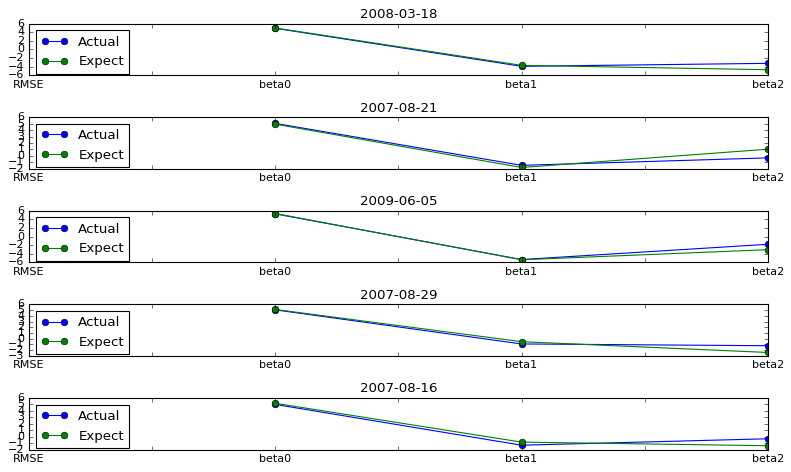

In [12]:
fig,axes=plt.subplots(5,1,sharey=False,sharex=False,figsize=(10,6))
for i in range(5):
    index_large=largest.index[i]
    location=np.argwhere(error_df.index==index_large)[0][0]
    df_tmp=pd.concat([beta.iloc[location+1],beta.iloc[location+1]+error_df.iloc[location]],
                           axis=1,
                           keys=['Actual','Expect'])
    df_tmp.plot(ax=axes[i],marker='o')
    
    axes[i].set_title(index_large.strftime("%Y-%m-%d"))
plt.tight_layout()

2008-03-18 00:00:00
         Actual    Expect
beta0  4.890198  4.969831
beta1 -3.941616 -3.720260
beta2 -3.252313 -4.732938


2007-08-21 00:00:00
         Actual    Expect
beta0  5.034964  4.913933
beta1 -1.471254 -1.802582
beta2 -0.313407  1.033116


2009-06-05 00:00:00
         Actual    Expect
beta0  5.284275  5.359568
beta1 -5.348875 -5.398339
beta2 -1.797869 -3.051381


2007-08-29 00:00:00
         Actual    Expect
beta0  5.037686  5.107779
beta1 -0.905880 -0.508511
beta2 -1.215821 -2.392618


2007-08-16 00:00:00
         Actual    Expect
beta0  4.996810  5.171525
beta1 -1.325081 -0.847511
beta2 -0.327373 -1.406458




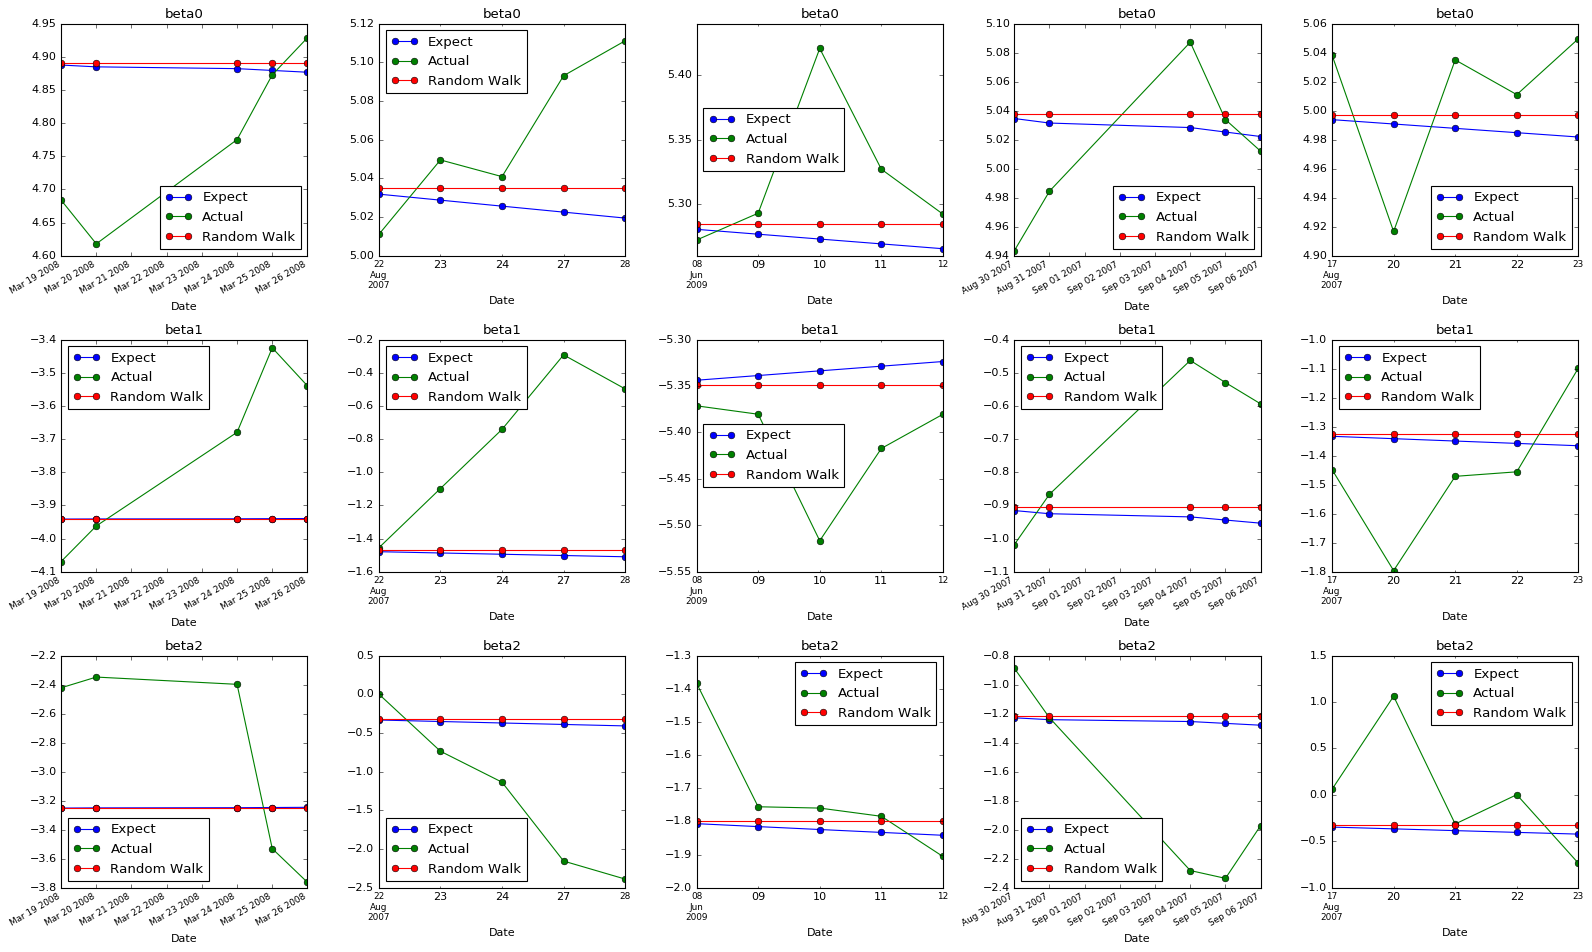

In [13]:
fig,axes=plt.subplots(3,5,sharey=False,sharex=False,figsize=(20,12))
estimation=[]
for i in range(5):
    index_large=largest.index[i]
    location=np.argwhere(error_df.index==index_large)[0][0]
    print index_large
    print_join(beta.iloc[location+1],beta.iloc[location+1]+error_df.iloc[location,:-1],['Actual','Expect'])
    print '\n'
    res={}
    
    for j in range(3):
        res['beta'+str(j)]=pd.concat([ar_res[j].predict(start=location+2,end=location+6,dynamic=True),
                 beta.iloc[location+2:location+7,j],
                      pd.Series(beta.iloc[location+1,j],index=beta.index[location+2:location+7])],
                      axis=1,
                      keys=['Expect','Actual','Random Walk'])
        #print res
        res['beta'+str(j)].plot(ax=axes[j,i],marker='o')
        labels = axes[j,i].get_xticklabels()
        plt.setp(labels, fontsize=8)
        
        #axes[j,i].set_axis()
        axes[j,i].set_title('beta'+str(j))
    estimation.append(res)
plt.tight_layout()        
#for index_large in 

In [14]:
estimation

[{'beta0':               Expect    Actual  Random Walk
  Date                                       
  2008-03-19  4.887471  4.683921     4.890198
  2008-03-20  4.884751  4.617970     4.890198
  2008-03-24  4.882039  4.775121     4.890198
  2008-03-25  4.879333  4.872712     4.890198
  2008-03-26  4.876635  4.928641     4.890198,
  'beta1':               Expect    Actual  Random Walk
  Date                                       
  2008-03-19 -3.941183 -4.069283    -3.941616
  2008-03-20 -3.940752 -3.961853    -3.941616
  2008-03-24 -3.940323 -3.679524    -3.941616
  2008-03-25 -3.939895 -3.424853    -3.941616
  2008-03-26 -3.939468 -3.539695    -3.941616,
  'beta2':               Expect    Actual  Random Walk
  Date                                       
  2008-03-19 -3.250973 -2.422240    -3.252313
  2008-03-20 -3.249643 -2.348222    -3.252313
  2008-03-24 -3.248323 -2.398261    -3.252313
  2008-03-25 -3.247011 -3.530527    -3.252313
  2008-03-26 -3.245709 -3.762567    -3.252313},
 {'

In [15]:
from IPython.display import display
beta_list=['beta0','beta1','beta2']
method_list=['Expect','Actual','Random Walk']
for i in range(5):
    df_tmp=pd.concat([estimation[i]['beta0'],estimation[i]['beta1'],estimation[i]['beta2']],axis=1,keys=['beta0','beta1','beta2'])
    beta_list=['beta0','beta1','beta2']
    #estimation[0].keys()
    #print df_tmp#.ix[0]['beta0']['Expect']
    
    def calculate_RMSE(row,col_name):
        return np.sqrt(1./3*np.sum(np.array([row[beta_tmp]['Actual']-row[beta_tmp][col_name] for beta_tmp in beta_list])**2))
    df_tmp['RMSE','Expect']=df_tmp.apply(calculate_RMSE,col_name='Expect',axis=1)
    df_tmp['RMSE','Random Walk']=df_tmp.apply(calculate_RMSE,col_name='Random Walk',axis=1)
    display(df_tmp)
    print largest.index[i]
    print df_tmp['RMSE'].mean()

beta0                           beta1                        \
              Expect    Actual Random Walk    Expect    Actual Random Walk   
Date                                                                         
2008-03-19  4.887471  4.683921    4.890198 -3.941183 -4.069283   -3.941616   
2008-03-20  4.884751  4.617970    4.890198 -3.940752 -3.961853   -3.941616   
2008-03-24  4.882039  4.775121    4.890198 -3.940323 -3.679524   -3.941616   
2008-03-25  4.879333  4.872712    4.890198 -3.939895 -3.424853   -3.941616   
2008-03-26  4.876635  4.928641    4.890198 -3.939468 -3.539695   -3.941616   

               beta2                            RMSE              
              Expect    Actual Random Walk    Expect Random Walk  
Date                                                              
2008-03-19 -3.250973 -2.422240   -3.252313  0.498210    0.499290  
2008-03-20 -3.249643 -2.348222   -3.252313  0.542887    0.545252  
2008-03-24 -3.248323 -2.398261   -3.252313  0.517060    0.520045  
2008-03-25 -3.247011 -3.530527   -3.252313  0.339457    0.338995  
2008-03-26 -3.245709 -3.762567   -3.252313  0.378446    0.375667

2008-03-18 00:00:00
Expect         0.455212
Random Walk    0.455850
dtype: float64


beta0                           beta1                        \
              Expect    Actual Random Walk    Expect    Actual Random Walk   
Date                                                                         
2007-08-22  5.031849  5.011030    5.034964 -1.478978 -1.455664   -1.471254   
2007-08-23  5.028743  5.049523    5.034964 -1.486676 -1.098158   -1.471254   
2007-08-24  5.025645  5.040898    5.034964 -1.494348 -0.741608   -1.471254   
2007-08-27  5.022555  5.093044    5.034964 -1.501996 -0.292443   -1.471254   
2007-08-28  5.019473  5.111098    5.034964 -1.509618 -0.497573   -1.471254   

               beta2                            RMSE              
              Expect    Actual Random Walk    Expect Random Walk  
Date                                                              
2007-08-22 -0.332771  0.002256   -0.313407  0.194268    0.182993  
2007-08-23 -0.352000 -0.735893   -0.313407  0.315570    0.325529  
2007-08-24 -0.371092 -1.135971   -0.313407  0.619648    0.634831  
2007-08-27 -0.390050 -2.155054   -0.313407  1.236018    1.262885  
2007-08-28 -0.408875 -2.387868   -0.313407  1.284399    1.323787

2007-08-21 00:00:00
Expect         0.729981
Random Walk    0.746005
dtype: float64


beta0                           beta1                        \
              Expect    Actual Random Walk    Expect    Actual Random Walk   
Date                                                                         
2009-06-08  5.280493  5.272203    5.284275 -5.343797 -5.371351   -5.348875   
2009-06-09  5.276722  5.292984    5.284275 -5.338735 -5.380391   -5.348875   
2009-06-10  5.272960  5.420690    5.284275 -5.333690 -5.516610   -5.348875   
2009-06-11  5.269208  5.327102    5.284275 -5.328662 -5.417249   -5.348875   
2009-06-12  5.265466  5.292289    5.284275 -5.323650 -5.380430   -5.348875   

               beta2                            RMSE              
              Expect    Actual Random Walk    Expect Random Walk  
Date                                                              
2009-06-08 -1.806776 -1.383288   -1.797869  0.245065    0.239811  
2009-06-09 -1.815620 -1.755789   -1.797869  0.043126    0.030767  
2009-06-10 -1.824402 -1.759789   -1.797869  0.140782    0.126747  
2009-06-11 -1.833122 -1.784548   -1.797869  0.067228    0.047211  
2009-06-12 -1.841780 -1.905669   -1.797869  0.051721    0.065015

2009-06-05 00:00:00
Expect         0.109584
Random Walk    0.101910
dtype: float64


beta0                           beta1                        \
              Expect    Actual Random Walk    Expect    Actual Random Walk   
Date                                                                         
2007-08-30  5.034564  4.943418    5.037686 -0.915470 -1.018246    -0.90588   
2007-08-31  5.031450  4.984493    5.037686 -0.925029 -0.866370    -0.90588   
2007-09-04  5.028345  5.087136    5.037686 -0.934555 -0.462974    -0.90588   
2007-09-05  5.025248  5.033805    5.037686 -0.944051 -0.529645    -0.90588   
2007-09-06  5.022159  5.012062    5.037686 -0.953515 -0.593861    -0.90588   

               beta2                            RMSE              
              Expect    Actual Random Walk    Expect Random Walk  
Date                                                              
2007-08-30 -1.228828 -0.887259   -1.215821  0.212556    0.207738  
2007-08-31 -1.241744 -1.228652   -1.215821  0.044035    0.038966  
2007-09-04 -1.254569 -2.281266   -1.215821  0.653186    0.666779  
2007-09-05 -1.267303 -2.335197   -1.215821  0.661363    0.681804  
2007-09-06 -1.279947 -1.971460   -1.215821  0.450053    0.472230

2007-08-29 00:00:00
Expect         0.404239
Random Walk    0.413504
dtype: float64


beta0                           beta1                        \
              Expect    Actual Random Walk    Expect    Actual Random Walk   
Date                                                                         
2007-08-17  4.993797  5.038319     4.99681 -1.333288 -1.447904   -1.325081   
2007-08-20  4.990793  4.916731     4.99681 -1.341467 -1.795930   -1.325081   
2007-08-21  4.987796  5.034964     4.99681 -1.349619 -1.471254   -1.325081   
2007-08-22  4.984808  5.011030     4.99681 -1.357744 -1.455664   -1.325081   
2007-08-23  4.981828  5.049523     4.99681 -1.365842 -1.098158   -1.325081   

               beta2                            RMSE              
              Expect    Actual Random Walk    Expect Random Walk  
Date                                                              
2007-08-17 -0.346639  0.060069   -0.327373  0.245310    0.235881  
2007-08-20 -0.365770  1.062171   -0.327373  0.866225    0.848321  
2007-08-21 -0.384765 -0.313407   -0.327373  0.085852    0.087592  
2007-08-22 -0.403627  0.002256   -0.327373  0.241535    0.204866  
2007-08-23 -0.422356 -0.735893   -0.327373  0.241208    0.271515

2007-08-16 00:00:00
Expect         0.336026
Random Walk    0.329635
dtype: float64


#### We could see that it cannot generate better result than random walk.